In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from matplotlib import rc, font_manager
rc('font',family="NanumSquareR")
import os

In [3]:
os.chdir("C:\\Users\\chanqun\\Downloads\ops")

In [4]:
regular=pd.read_csv("Regular_Season_Batter.csv")

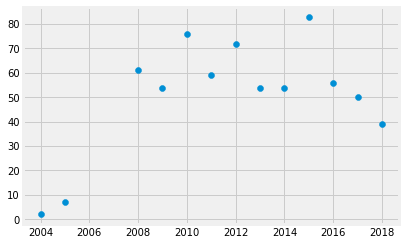

In [13]:
plt.scatter(regular.loc[regular['batter_name']=='박석민']['year'],regular.loc[regular['batter_name']=='박석민']['BB'])

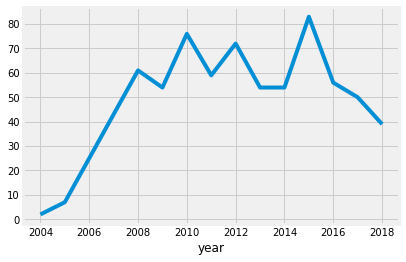

In [14]:
regular.loc[regular['batter_name']=='박석민',].groupby('year')['BB'].mean().plot()

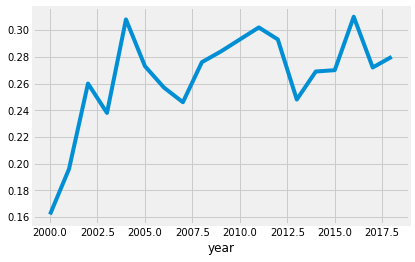

In [15]:
regular.loc[regular['batter_name']=='이범호',].groupby('year')['avg'].mean().plot()

Text(0, 0.5, 'y+1년도의 성적')

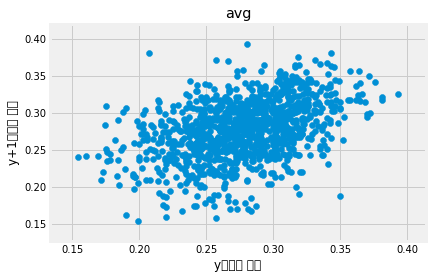

In [25]:
var="avg"
x=[]
y=[]
regular1=regular.loc[regular['AB']>=100,]


for name in regular1['batter_name'].unique():
    a=regular1.loc[regular1['batter_name']==name,]
    k=[]
    for i in a['year'].unique():
        if (a['year']==i+1).sum()>0:
            k.append(i)
    for i in k:
        x.append(a.loc[a['year']==i,var].iloc[0])
        y.append(a.loc[a['year']==i+1,var].iloc[0])        
plt.scatter(x,y)
plt.title(var)
plt.xlabel('y년도의 성적')
plt.ylabel('y+1년도의 성적')

0.6537531676446489


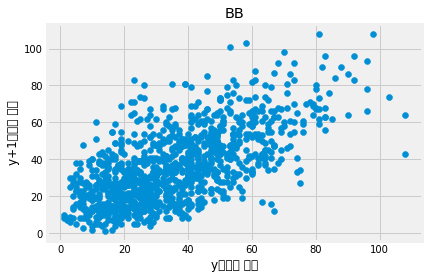

In [31]:
var="BB"
x=[]
y=[]
regular1=regular.loc[regular['AB']>=100,]


for name in regular1['batter_name'].unique():
    a=regular1.loc[regular1['batter_name']==name,]
    k=[]
    for i in a['year'].unique():
        if (a['year']==i+1).sum()>0:
            k.append(i)
    for i in k:
        x.append(a.loc[a['year']==i,var].iloc[0])
        y.append(a.loc[a['year']==i+1,var].iloc[0])        
plt.scatter(x,y)
plt.title(var)
plt.xlabel('y년도의 성적')
plt.ylabel('y+1년도의 성적')

print(pd.Series(x).corr(pd.Series(y)))

In [34]:
def get_self_corr(var):
    x=[]
    y=[]
    regular1=regular.loc[regular['AB']>=100,]


    for name in regular1['batter_name'].unique():
        a=regular1.loc[regular1['batter_name']==name,]
        k=[]
        for i in a['year'].unique():
            if (a['year']==i+1).sum()>0:
                k.append(i)
        for i in k:
            x.append(a.loc[a['year']==i,var].iloc[0])
            y.append(a.loc[a['year']==i+1,var].iloc[0])     

    return(pd.Series(x).corr(pd.Series(y)))

In [35]:
get_self_corr("OPS")

0.5967835522092053

In [36]:
regular.columns

Index(['batter_id', 'batter_name', 'year', 'team', 'avg', 'G', 'AB', 'R', 'H',
       '2B', '3B', 'HR', 'TB', 'RBI', 'SB', 'CS', 'BB', 'HBP', 'SO', 'GDP',
       'SLG', 'OBP', 'E', 'height/weight', 'year_born', 'position', 'career',
       'starting_salary', 'OPS'],
      dtype='object')

In [38]:
agg={}
for i in ['G', 'AB', 'R', 'H', '2B', '3B', 'HR', 'TB', 'RBI', 'SB', 'CS', 'BB', 'HBP', 'SO', 'GDP', 'SLG', 'OBP', 'E']:
    agg[i]=get_self_corr(i)

In [39]:
agg

{'G': 0.2827945222858424,
 'AB': 0.5345220495165055,
 'R': 0.6226214086043601,
 'H': 0.5780431760833786,
 '2B': 0.5150624616599283,
 '3B': 0.44087969523833104,
 'HR': 0.7412597496536675,
 'TB': 0.6343944721859059,
 'RBI': 0.651947415097796,
 'SB': 0.7260764196191684,
 'CS': 0.5732143724546752,
 'BB': 0.6537531676446489,
 'HBP': 0.5627917256433479,
 'SO': 0.5664029028016614,
 'GDP': 0.4902224105414654,
 'SLG': 0.6139336781007896,
 'OBP': 0.5452616730047514,
 'E': 0.6225595423969393}

신뢰성이 높은 지표 : 홈런, 삼진, 볼넷 (lag_ 변수들 이용)
신뢰성이 낮은 지표 : 3루타, avg, 2루타, 1루타 (누적 성적 이용)

In [7]:
regular.loc[(regular['batter_name']=='강경학')&(regular['year']<2016),'1B'].sum()/regular.loc[(regular['batter_name']=='강경학')&(regular['year']<2016),'AB'].sum()

KeyError: 'the label [1B] is not in the [columns]'